In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from glob import glob

import cftime
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

import util
import oae_smyle

In [3]:
caselist = [
    'smyle-fosi.regional.lat-range-basin.000',
    'smyle-fosi.regional.lat-range-basin.001',
    'smyle-fosi.regional.lat-range-basin.002',
    'smyle-fosi.regional.lat-range-basin.003',
    'smyle-fosi.regional.lat-range-basin.004',
    'smyle-fosi.regional.lat-range-basin.005',
    'smyle-fosi.regional.lat-range-basin.006',
    'smyle-fosi.regional.lat-range-basin.007',
    'smyle-fosi.regional.lat-range-basin.008',
    'smyle-fosi.regional.lat-range-basin.009',
    'smyle-fosi.regional.lat-range-basin.010',
    'smyle-fosi.regional.lat-range-basin.011',
]

dsets = {}
for case in caselist[:1]:
    member_id = case.split('.')[-1]
    dsets[member_id] = oae_smyle.open_dataset(
        case=case,
        stream='pop.h',
    )

dsets

{'000': <xarray.Dataset>
 Dimensions:                          (time: 72, d2: 2, moc_comp: 3, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60, z_w_bot: 60, lat_aux_grid: 395, moc_z: 61, nlat: 384, nlon: 320)
 Coordinates: (12/15)
     transport_components             (transport_comp) |S384 dask.array<chunksize=(5,), meta=np.ndarray>
     transport_regions                (transport_reg) |S384 dask.array<chunksize=(2,), meta=np.ndarray>
   * time                             (time) object 0347-01-16 12:00:00 ... 03...
   * z_t                              (z_t) float32 500.0 1.5e+03 ... 5.375e+05
   * z_t_150m                         (z_t_150m) float32 500.0 ... 1.45e+04
   * z_w                              (z_w) float32 0.0 1e+03 ... 5e+05 5.25e+05
     ...                               ...
   * moc_z                            (moc_z) float32 0.0 1e+03 ... 5.5e+05
     TLONG                            (nlat, nlon) float64 dask.array<chunksize=(384, 320)

In [7]:



flux_effect = {}
alk_excess = {}
for key, ds in dsets.items():
    flux_effect[key] = compute_flux_effect(ds)
    alk_excess[key] = compute_alk_excess_100m(ds)

flux_effect

{'000': <xarray.DataArray (time: 72, nlat: 384, nlon: 320)>
 dask.array<mul, shape=(72, 384, 320), dtype=float32, chunksize=(1, 384, 320), chunktype=numpy.ndarray>
 Coordinates:
   * time        (time) object 0347-01-16 12:00:00 ... 0352-12-16 12:00:00
     TLONG       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
     TLAT        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
     KMT         (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
     time_delta  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
     area_m2     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
 Dimensions without coordinates: nlat, nlon
 Attributes:
     long_name:     DIC Surface Gas Flux
     units:         mmol m$^{-2}$ yr$^{-1}$
     grid_loc:      2110
     cell_methods:  time: mean}

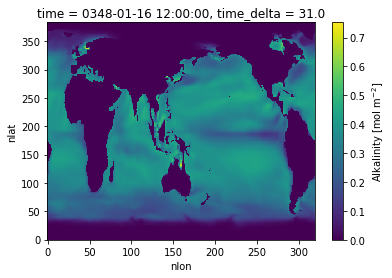

In [9]:
alk_excess['000'].isel(time=12).plot()

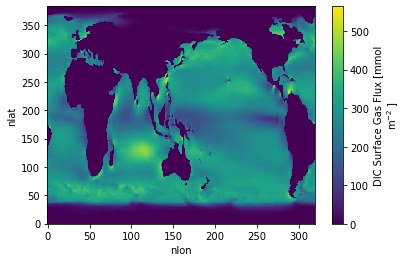

In [8]:
time_integral(flux_effect['000'], convert_time=1.0 / 365.0).plot()

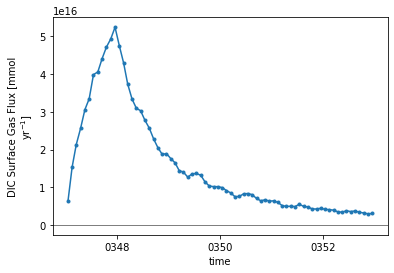

In [12]:
global_ts(flux_effect['000']).plot(marker='.')
plt.axhline(0.0, linewidth=0.5, color='k')

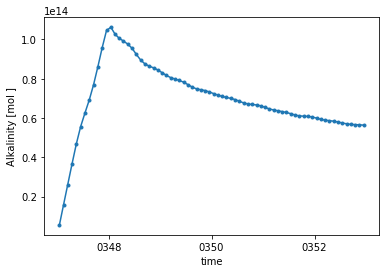

In [11]:
global_ts(alk_excess['000']).plot(marker='.');